In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset:https://www.kaggle.com/arjunbhasin2013/ccdata
dataset = pd.read_csv('/content/creditcarddata.csv')

In [ ]:
dataset.head()
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4999 non-null   object 
 1   BALANCE                           4999 non-null   float64
 2   BALANCE_FREQUENCY                 4999 non-null   float64
 3   PURCHASES                         4999 non-null   float64
 4   ONEOFF_PURCHASES                  4999 non-null   float64
 5   INSTALLMENTS_PURCHASES            4999 non-null   float64
 6   CASH_ADVANCE                      4999 non-null   float64
 7   PURCHASES_FREQUENCY               4999 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4999 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4999 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4999 non-null   float64
 11  CASH_ADVANCE_TRX                  4999 non-null   int64  
 12  PURCHA

In [ ]:
#categorical column
dataset.select_dtypes(include='object').columns

Index(['CUST_ID'], dtype='object')

In [ ]:
#numerical columns
dataset.select_dtypes(include=['int64','float64']).columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4839.000000,4999.000000,4999.000000
mean,1934.857455,0.897030,1208.256673,749.281418,459.027379,1106.638599,0.494913,0.242038,0.352852,0.138952,3.342669,16.755551,5477.408977,2082.837726,965.328204,0.144951,11.680536
std,2352.399025,0.218006,2557.259385,1982.943977,1026.878161,2316.251588,0.402945,0.321869,0.396123,0.203385,7.013764,28.387494,3981.284228,3374.493908,2372.043916,0.287445,1.075651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000
25%,209.334312,0.909091,45.650000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,2300.000000,478.854548,179.138467,0.000000,12.000000
50%,1121.068043,1.000000,435.140000,112.000000,77.910000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,8.000000,4500.000000,1075.317643,400.735862,0.000000,12.000000
75%,2705.370797,1.000000,1346.045000,773.650000,509.290000,1294.325634,1.000000,0.363636,0.750000,0.250000,4.000000,20.000000,7500.000000,2260.296996,1014.939580,0.100000,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,15497.190000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.isnull().values.sum()

160

In [ ]:
dataset.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
#filling na by mean
dataset['MINIMUM_PAYMENTS']=dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS']).mean()
#dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
#Remove ID variable
dataset = dataset.drop(columns='CUST_ID')

In [ ]:
#Check correlation
corr=dataset.corr()

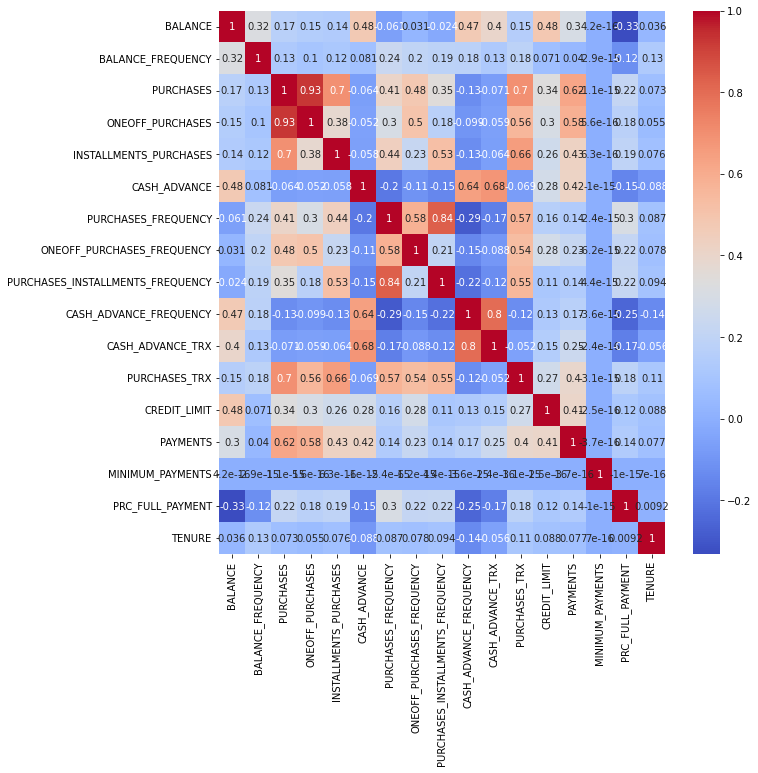

In [ ]:
#plot corr
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr,annot=True, cmap='coolwarm')

In [ ]:
from copy import deepcopy
#Create train test dataset
#No Targe Variable Present

#Feature Scaling
df = dataset.copy()

In [ ]:
from sklearn.preprocessing import  StandardScaler
sc      = StandardScaler()
dataset = sc.fit_transform(dataset)

In [ ]:
#Finding Clustered data 
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i,init='k-means++') #initialization=km++
  kmeans.fit(dataset)
  wcss.append(kmeans.inertia_)#inertia_ = sum squared distances calculated 

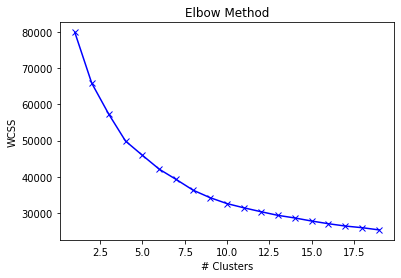

In [ ]:
plt.plot(range(1,20), wcss,'bx-')
plt.title('Elbow Method')
plt.xlabel('# Clusters')
plt.ylabel('WCSS') #Within clusters Sum of Squares
plt.show()

In [ ]:
# Build a Model for finding ~8 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=0)

In [ ]:
# Determine Dependent Variable 
y_means = kmeans.fit_predict(dataset)

In [ ]:
y_means

array([2, 2, 3, ..., 2, 1, 2], dtype=int32)

In [ ]:
y_means = y_means.reshape(len(y_means),1)
b = np.concatenate((y_means,df), axis=1)

In [ ]:
df_final = pd.DataFrame(data=b,columns=['Cluster#','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])


In [ ]:
df_final.head()

,Cluster#,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,965.328204,0.000000,12.0
1,2.0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,965.328204,0.222222,12.0
2,3.0,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,965.328204,0.000000,12.0
3,5.0,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,965.328204,0.000000,12.0
4,2.0,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,965.328204,0.000000,12.0
